In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set_style('whitegrid')

data = {
    'timestamp': pd.to_datetime([
        '2025-07-30 08:30:00', '2025-07-30 09:15:00', '2025-07-30 09:45:00',
        '2025-07-30 12:00:00', '2025-07-30 13:30:00', '2025-07-30 17:00:00',
        '2025-07-30 18:30:00', '2025-07-30 19:00:00', '2025-07-30 21:00:00',
        '2025-07-30 22:30:00'
    ]),
    'cab_type': ['Mini', 'Sedan', 'Mini', 'Sedan', 'Mini', 'SUV', 'Sedan', 'Mini', 'Sedan', 'Mini'],
    'distance_km': [5.5, 12.1, 3.2, 8.0, 4.5, 6.7, 15.3, 4.1, 9.8, 7.6],
    'temperature_celsius': [28.5, 29.0, 29.2, 32.0, 31.5, 29.8, 27.5, np.nan, 26.0, 25.5],
    'weather_condition': ['Clear', 'Clear', 'Clear', 'Clear', 'Clear', 'Rainy', 'Rainy', 'Rainy', 'Clear', 'Foggy'],
    'demand_multiplier': [1.0, 1.5, 1.2, 1.0, 1.0, 2.0, 2.5, 2.2, 1.2, 1.8]
}

df = pd.DataFrame(data)
df


,timestamp,cab_type,distance_km,temperature_celsius,weather_condition,demand_multiplier
0,2025-07-30 08:30:00,Mini,5.5,28.5,Clear,1.0
1,2025-07-30 09:15:00,Sedan,12.1,29.0,Clear,1.5
2,2025-07-30 09:45:00,Mini,3.2,29.2,Clear,1.2
3,2025-07-30 12:00:00,Sedan,8.0,32.0,Clear,1.0
4,2025-07-30 13:30:00,Mini,4.5,31.5,Clear,1.0
5,2025-07-30 17:00:00,SUV,6.7,29.8,Rainy,2.0
6,2025-07-30 18:30:00,Sedan,15.3,27.5,Rainy,2.5
7,2025-07-30 19:00:00,Mini,4.1,NaN,Rainy,2.2
8,2025-07-30 21:00:00,Sedan,9.8,26.0,Clear,1.2
9,2025-07-30 22:30:00,Mini,7.6,25.5,Foggy,1.8


In [4]:
weather_impact = df.groupby('weather_condition')['demand_multiplier'].mean().sort_values(ascending=False)
print("---Average Demand Multiplier by Weather Condition---")
print(weather_impact)

---Average Demand Multiplier by Weather Condition---
weather_condition
Rainy    2.233333
Foggy    1.800000
Clear    1.150000
Name: demand_multiplier, dtype: float64


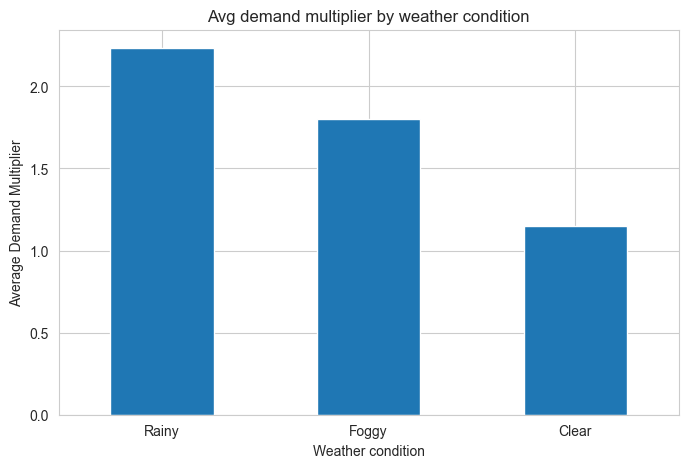

In [6]:
#bar plot
plt.figure(figsize=(8,5))
weather_impact.plot(kind='bar')

plt.title('Avg demand multiplier by weather condition')
plt.xlabel('Weather condition')
plt.ylabel('Average Demand Multiplier')
plt.xticks(rotation=0)
plt.show()

In [9]:
# grouping by multiple columns

multi_group_impact = df.groupby(['weather_condition' , 'cab_type'])['demand_multiplier'].mean()
print("---avg demand multiplier by weather and cab type---")
print(multi_group_impact)

---avg demand multiplier by weather and cab type---
weather_condition  cab_type
Clear              Mini        1.066667
                   Sedan       1.233333
Foggy              Mini        1.800000
Rainy              Mini        2.200000
                   SUV         2.000000
                   Sedan       2.500000
Name: demand_multiplier, dtype: float64


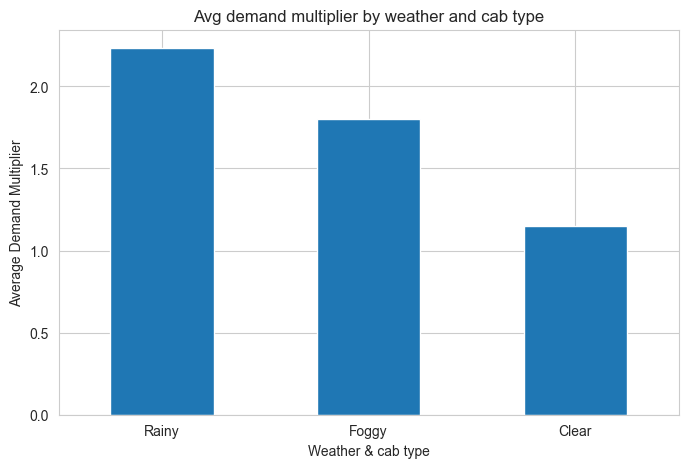

In [10]:
#bar plot
plt.figure(figsize=(8,5))
weather_impact.plot(kind='bar')

plt.title('Avg demand multiplier by weather and cab type')
plt.xlabel('Weather & cab type')
plt.ylabel('Average Demand Multiplier')
plt.xticks(rotation=0)
plt.show()